***
### Expects the `dataset_28_optdigits_bw_1v8_*.csv` data files to be loaded into a folder called `data\`

***

In [ ]:
import tensorflow as tf
import pandas as pd
import os
from os import listdir
from os.path import isfile, join

In [ ]:
try:
    os.makedirs('data')
    print("can you place the training files in a folder called \data\ ?")
    %ll
except:
    print("data folder exists")
    %ll

data folder exists
total 8
drwxr-xr-x 3 root 4096 Apr 26 20:53 data/
drwxr-xr-x 1 root 4096 Apr  3 16:24 sample_data/


In [ ]:
data = [f for f in listdir("data") if isfile(join("data", f))]
if len(data) < 10:
    raise ValueError('Please add the dataset_28_optdigits_bw_1v8_*.csv files to the data folder, including the test csv')

In [ ]:
def to_index(df):
    out=df.copy()
    for i in range(len(out)):
        if out[i]==8:
            out[i]=0
    return out

In [ ]:
data

['dataset_28_optdigits_bw_1v8_2n2_train.csv',
 'dataset_28_optdigits_bw_1v8_16n16_train.csv',
 'dataset_28_optdigits_bw_1v8_256n256_train.csv',
 'dataset_28_optdigits_bw_1v8_8n8_train.csv',
 'dataset_28_optdigits_bw_1v8_32n32_train.csv',
 'dataset_28_optdigits_bw_1v8_all_train.csv',
 'dataset_28_optdigits_bw_1v8_128n128_train.csv',
 'dataset_28_optdigits_bw_1v8_test.csv',
 'dataset_28_optdigits_bw_1v8_64n64_train.csv',
 'dataset_28_optdigits_bw_1v8_1n1_train.csv',
 'dataset_28_optdigits_bw_1v8_4n4_train.csv']

In [ ]:
test_data = pd.read_csv("data/dataset_28_optdigits_bw_1v8_test.csv", names = [x for x in range(0, 65)])
x_test=test_data.drop(columns=[64])
y_test=test_data[64]

In [ ]:
for csv in data:
    print("\n" + csv)
    path = "data/" + csv
    train_data = pd.read_csv(path, names = [x for x in range(0,65)])
    x_train = train_data.drop(columns=[64])
    y_train = train_data[64]

    model = tf.keras.models.Sequential([
        tf.keras.Input(shape = (64)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(2)
    ])

    predictions = model(x_train[:1]).numpy()
    print(predictions)

    tf.nn.softmax(predictions).numpy()

    y_train=to_index(y_train)
    y_test=to_index(y_test)

    loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
    loss_fn(y_train[:1], predictions).numpy()

    model.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])

    model.fit(x_train, y_train, epochs=5)
    model.evaluate(x_test,  y_test)


dataset_28_optdigits_bw_1v8_2n2_train.csv
[[-0.30663526  0.19665766]]
Epoch 1/5
1/1 [==============================] - 0s 1ms/step - loss: 0.5832 - accuracy: 0.7500
Epoch 2/5
1/1 [==============================] - 0s 992us/step - loss: 0.6313 - accuracy: 0.7500
Epoch 3/5
1/1 [==============================] - 0s 2ms/step - loss: 0.6475 - accuracy: 0.7500
Epoch 4/5
1/1 [==============================] - 0s 930us/step - loss: 0.6771 - accuracy: 0.5000
Epoch 5/5
12/12 [==============================] - 0s 2ms/step - loss: 0.6751 - accuracy: 0.5197

dataset_28_optdigits_bw_1v8_16n16_train.csv
[[ 0.12509194 -0.29231778]]
Epoch 1/5
1/1 [==============================] - 0s 2ms/step - loss: 0.6782 - accuracy: 0.5938
Epoch 2/5
1/1 [==============================] - 0s 963us/step - loss: 0.6320 - accuracy: 0.6562
Epoch 3/5
1/1 [==============================] - 0s 1ms/step - loss: 0.5730 - accuracy: 0.7188
Epoch 4/5
1/1 [==============================] - 0s 951us/step - loss: 0.5910 - accuracy

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.advanced_activations import ELU
from keras.models import Sequential
from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras.optimizers import RMSprop, SGD, Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
import numpy as np
import matplotlib.pyplot as plt
import os
import shutil
import matplotlib
import math  

num_classes = 2
img_rows, img_cols = 8, 8

Using TensorFlow backend.


In [ ]:
try:
    os.makedirs('test/1'), os.makedirs('test/8')
except:
    print("folders already exist")

number_of_test_files = 0
images = np.genfromtxt("data/dataset_28_optdigits_bw_1v8_test.csv", delimiter=',')
for image in images:
    image_array = np.asarray(np.split(image[:64],8))
    if image[64] == 1: matplotlib.image.imsave("test/1/{}.jpg".format(number_of_test_files), image_array)
    elif image[64] == 8: matplotlib.image.imsave("test/8/{}.jpg".format(number_of_test_files), image_array)
    number_of_test_files += 1

In [ ]:
%ll

total 12
drwxr-xr-x 3 root 4096 Apr 26 20:53 data/
drwxr-xr-x 1 root 4096 Apr  3 16:24 sample_data/
drwxr-xr-x 4 root 4096 Apr 26 20:54 test/


In [ ]:
%ll test

total 8
drwxr-xr-x 2 root 4096 Apr 26 20:54 1/
drwxr-xr-x 2 root 4096 Apr 26 20:54 8/


In [ ]:
def save_training_data(csv):
    path = "data/" + csv
    try:
        os.makedirs('train/1'), os.makedirs('train/8'), os.makedirs('test/1'), os.makedirs('test/8')
    except:
        print("folders already exist")

    number_of_train_files = 0
    images = np.genfromtxt(path, delimiter=',')
    for image in images:
        image_array = np.asarray(np.split(image[:64],8))
        if image[64] == 1: matplotlib.image.imsave("train/1/{}.jpg".format(number_of_train_files), image_array)
        elif image[64] == 8: matplotlib.image.imsave("train/8/{}.jpg".format(number_of_train_files), image_array)
        number_of_train_files += 1
    
    return number_of_train_files

In [ ]:
model = Sequential()

model.add(Conv2D(64, (2, 2), padding = "same", kernel_initializer="he_normal", input_shape = (img_rows, img_cols, 1)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Dense(128, kernel_initializer="he_normal"))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(2, kernel_initializer="he_normal"))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(num_classes, kernel_initializer="he_normal"))
model.add(Activation("softmax"))

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 8, 8, 64)          320       
_________________________________________________________________
activation_1 (Activation)    (None, 8, 8, 64)          0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 8, 8, 64)          256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 4, 64)          0         
_________________________________________________________________
dense_1 (Dense)              (None, 4, 4, 128)         8320      
_________________________________________________________________
activation_2 (Activation)    (None, 4, 4, 128)        

In [ ]:
train_data_dir = 'train'
validation_data_dir = 'test'
model_history = []

for csv in data:
    number_of_train_files = save_training_data(csv)

    if number_of_train_files > 16:
        batch_size = 16
    else:
        batch_size = 2

    train_datagen = ImageDataGenerator(
        rotation_range=30,
        shear_range=0.3,
        zoom_range=0.3,
        width_shift_range=0.4,
        height_shift_range=0.4,
        horizontal_flip=True,
        fill_mode='nearest')
    
    validation_datagen = ImageDataGenerator()
    
    train_generator = train_datagen.flow_from_directory(
            train_data_dir,
            color_mode = 'grayscale',
            target_size=(img_rows, img_cols),
            batch_size=batch_size,
            class_mode='categorical',
            shuffle=True)
    
    validation_generator = validation_datagen.flow_from_directory(
            validation_data_dir,
            color_mode = 'grayscale',
            target_size=(img_rows, img_cols),
            batch_size=batch_size,
            class_mode='categorical',
            shuffle=True)

    checkpoint = ModelCheckpoint("model_" + csv.split(".")[0] + ".h5",
                                monitor="val_loss",
                                mode="min",
                                save_best_only = True,
                                verbose = 2)

    earlystop = EarlyStopping(monitor = 'val_loss', 
                            min_delta = 0, 
                            patience = 150,
                            verbose = 2, 
                            restore_best_weights = True)

    reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', 
                                factor = 0.2, 
                                patience = 150, 
                                verbose = 2, 
                                min_delta = 0.0001)

    callbacks = [earlystop, checkpoint, reduce_lr]

    model.compile(loss = 'categorical_crossentropy',
                optimizer = Adam(lr=0.001),
                metrics = ['accuracy'])

    epochs = 9999

    history = model.fit_generator(
        train_generator,
        steps_per_epoch = number_of_train_files // batch_size,
        epochs = epochs,
        callbacks = callbacks,
        validation_data = validation_generator,
        validation_steps = number_of_test_files // batch_size)
    
    model_history.append([history, csv.split(".")[0]])

Streaming output truncated to the last 5000 lines.
Epoch 451/9999
48/48 [==============================] - 1s 15ms/step - loss: 0.4948 - accuracy: 0.7461 - val_loss: 0.4219 - val_accuracy: 0.8500

Epoch 00451: val_loss did not improve from 0.07969
Epoch 452/9999
48/48 [==============================] - 1s 16ms/step - loss: 0.4818 - accuracy: 0.7773 - val_loss: 0.6333 - val_accuracy: 0.7735

Epoch 00452: val_loss did not improve from 0.07969
Epoch 453/9999
48/48 [==============================] - 1s 18ms/step - loss: 0.5084 - accuracy: 0.7318 - val_loss: 0.4281 - val_accuracy: 0.8147

Epoch 00453: val_loss did not improve from 0.07969
Epoch 454/9999
48/48 [==============================] - 1s 17ms/step - loss: 0.4821 - accuracy: 0.7578 - val_loss: 0.4146 - val_accuracy: 0.7676

Epoch 00454: val_loss did not improve from 0.07969
Epoch 455/9999
48/48 [==============================] - 1s 16ms/step - loss: 0.4722 - accuracy: 0.7643 - val_loss: 0.8265 - val_accuracy: 0.6676

Epoch 00455: va

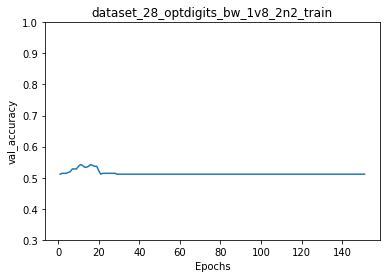

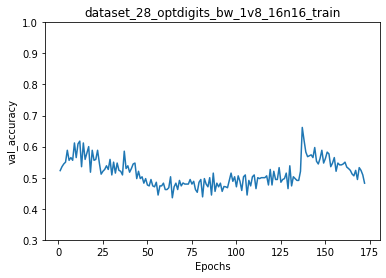

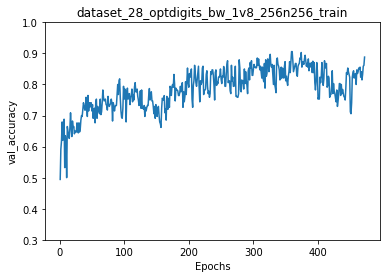

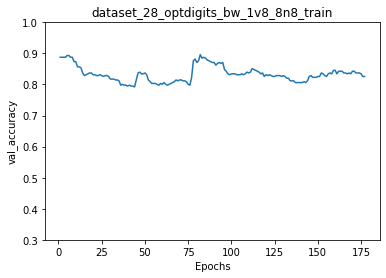

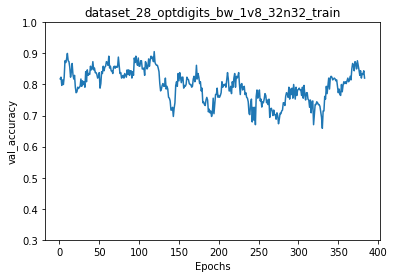

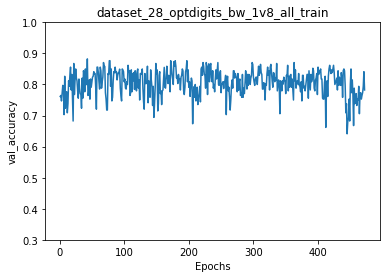

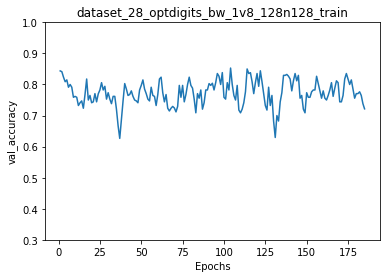

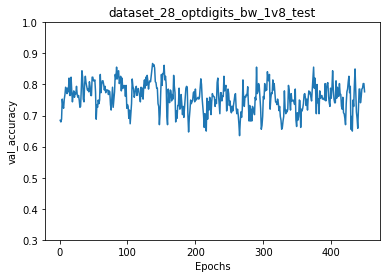

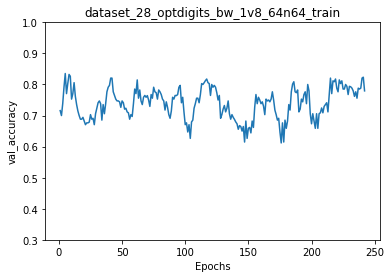

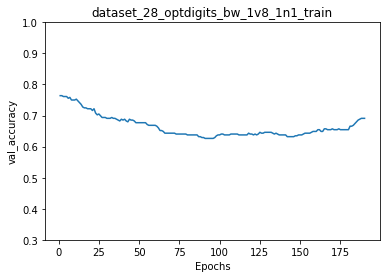

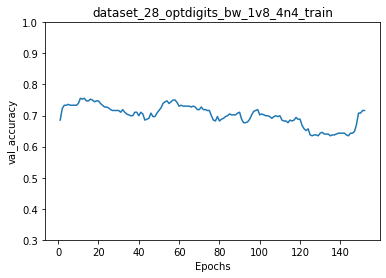

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

for history in model_history:
    plt.figure()
    plt.ylim(0.3, 1)
    plt.title(history[1])
    plt.plot(range(1,len(history[0].history['val_accuracy']) + 1), history[0].history['val_accuracy'])
    plt.xlabel("Epochs")
    plt.ylabel("val_accuracy")
    plt.show()

In [ ]:
%ll

total 2392
drwxr-xr-x 3 root   4096 Apr 26 20:53 data/
-rw-r--r-- 1 root 217920 Apr 26 21:12 model_dataset_28_optdigits_bw_1v8_128n128_train.h5
-rw-r--r-- 1 root 217920 Apr 26 20:56 model_dataset_28_optdigits_bw_1v8_16n16_train.h5
-rw-r--r-- 1 root 217920 Apr 26 21:18 model_dataset_28_optdigits_bw_1v8_1n1_train.h5
-rw-r--r-- 1 root 217920 Apr 26 21:00 model_dataset_28_optdigits_bw_1v8_256n256_train.h5
-rw-r--r-- 1 root 217920 Apr 26 20:54 model_dataset_28_optdigits_bw_1v8_2n2_train.h5
-rw-r--r-- 1 root 217920 Apr 26 21:04 model_dataset_28_optdigits_bw_1v8_32n32_train.h5
-rw-r--r-- 1 root 217920 Apr 26 21:19 model_dataset_28_optdigits_bw_1v8_4n4_train.h5
-rw-r--r-- 1 root 217920 Apr 26 21:16 model_dataset_28_optdigits_bw_1v8_64n64_train.h5
-rw-r--r-- 1 root 217920 Apr 26 21:02 model_dataset_28_optdigits_bw_1v8_8n8_train.h5
-rw-r--r-- 1 root 217920 Apr 26 21:09 model_dataset_28_optdigits_bw_1v8_all_train.h5
-rw-r--r-- 1 root 217920 Apr 26 21:15 model_dataset_28_optdigits_bw_1v8_test.h5
d

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding = 'same', kernel_initializer="he_normal", input_shape = (img_rows, img_cols, 1)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), padding = "same", kernel_initializer="he_normal", input_shape = (img_rows, img_cols, 1)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), padding="same", kernel_initializer="he_normal"))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding="same", kernel_initializer="he_normal"))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), padding="same", kernel_initializer="he_normal"))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), padding="same", kernel_initializer="he_normal"))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(32, kernel_initializer="he_normal"))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(64, kernel_initializer="he_normal"))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(128, kernel_initializer="he_normal"))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(256, kernel_initializer="he_normal"))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(512, kernel_initializer="he_normal"))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(1028, kernel_initializer="he_normal"))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(num_classes, kernel_initializer="he_normal"))
model.add(Activation("softmax"))

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 8, 8, 32)          320       
_________________________________________________________________
activation_5 (Activation)    (None, 8, 8, 32)          0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 8, 8, 32)          128       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 32)          9248      
_________________________________________________________________
activation_6 (Activation)    (None, 8, 8, 32)          0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 8, 8, 32)          128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 32)         

In [ ]:
number_of_train_files = save_training_data('dataset_28_optdigits_bw_1v8_all_train.csv')
batch_size = 16

train_datagen = ImageDataGenerator(
    rotation_range=30,
    shear_range=0.3,
    zoom_range=0.3,
    width_shift_range=0.4,
    height_shift_range=0.4,
    horizontal_flip=True,
    fill_mode='nearest')

validation_datagen = ImageDataGenerator()

train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        color_mode = 'grayscale',
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True)

validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        color_mode = 'grayscale',
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True)

checkpoint = ModelCheckpoint("FINAL_model_dataset_28_optdigits_bw_1v8_all_train.h5",
                            monitor="val_loss",
                            mode="min",
                            save_best_only = True,
                            verbose=2)

earlystop = EarlyStopping(monitor = 'val_loss', 
                        min_delta = 0, 
                        patience = 550,
                        verbose = 2,
                        restore_best_weights = True)

reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', 
                            factor = 0.2, 
                            patience = 550, 
                            verbose = 2, 
                            min_delta = 0.0001)

callbacks = [earlystop, checkpoint, reduce_lr]

model.compile(loss = 'categorical_crossentropy',
            optimizer = Adam(lr=0.001),
            metrics = ['accuracy'])

epochs = 9999

history = model.fit_generator(
    train_generator,
    steps_per_epoch = number_of_train_files // batch_size,
    epochs = epochs,
    callbacks = callbacks,
    validation_data = validation_generator,
    validation_steps = number_of_test_files // batch_size)

folders already exist
Found 1157 images belonging to 2 classes.
Found 356 images belonging to 2 classes.
Epoch 1/9999
48/48 [==============================] - 4s 89ms/step - loss: 1.4812 - accuracy: 0.5091 - val_loss: 0.7939 - val_accuracy: 0.6818

Epoch 00001: val_loss improved from inf to 0.79388, saving model to FINAL_model_dataset_28_optdigits_bw_1v8_all_train.h5
Epoch 2/9999
48/48 [==============================] - 2s 37ms/step - loss: 1.2798 - accuracy: 0.5350 - val_loss: 0.5716 - val_accuracy: 0.6647

Epoch 00002: val_loss improved from 0.79388 to 0.57160, saving model to FINAL_model_dataset_28_optdigits_bw_1v8_all_train.h5
Epoch 3/9999
48/48 [==============================] - 1s 29ms/step - loss: 1.2521 - accuracy: 0.5535 - val_loss: 1.5976 - val_accuracy: 0.4794

Epoch 00003: val_loss did not improve from 0.57160
Epoch 4/9999
48/48 [==============================] - 1s 31ms/step - loss: 1.1781 - accuracy: 0.5378 - val_loss: 0.7702 - val_accuracy: 0.4941

Epoch 00004: val_loss 

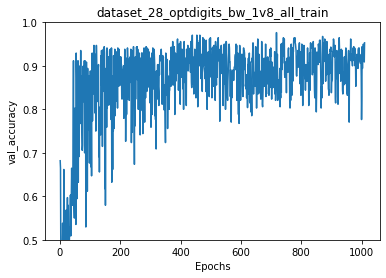

In [ ]:
plt.figure()
plt.title("dataset_28_optdigits_bw_1v8_all_train")
plt.ylim(0.5, 1)
plt.plot(range(1,len(history.history['val_accuracy']) + 1), history.history['val_accuracy'])
plt.xlabel("Epochs")
plt.ylabel("val_accuracy")
plt.show()